# Algoritmos de regresion lineal

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import time
from datetime import datetime
import scipy.spatial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# Training set con encoding

In [2]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'sexo_numerico': np.dtype('uint8'),
                   'edad': np.dtype('uint16'), 'estado_code': np.dtype('uint8'),
                   'sexo_code': np.dtype('uint8'), 'nombre_code': np.dtype('uint8'),
                   'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

trainingSet = pd.read_csv('Data/trainingSet.csv',dtype=column_types)
trainingSet.drop(columns=['Unnamed: 0'],inplace=True)
trainingSet.drop(columns=['sexo_numerico'],inplace=True)

In [3]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439964 entries, 0 to 9439963
Data columns (total 12 columns):
idaviso                      uint64
idpostulante                 object
se_postulo                   uint8
edad                         uint16
estado_code                  uint8
sexo_code                    uint8
nombre_code                  uint8
nombre_area_code             uint8
denominacion_empresa_code    uint16
nivel_laboral_code           uint8
tipo_de_trabajo_code         uint8
nombre_zona_code             uint8
dtypes: object(1), uint16(2), uint64(1), uint8(8)
memory usage: 252.1+ MB


In [4]:
#Vamos a codificar la columna de idpostulantes
lb_make1 = LabelEncoder()
trainingSet["idpostulante_code"] = lb_make1.fit_transform(trainingSet["idpostulante"])

In [5]:
trainingSet.drop(columns=['idpostulante'],inplace=True) #No sirve para el algoritmo de ML

# Testing sets con encoding

In [6]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_mean = pd.read_csv('TestingSets/testingSet_imp_mean.csv')
testingSet_imp_mean.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
testingSet_imp_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
nombre_area_code             100000 non-null float64
denominacion_empresa_code    100000 non-null float64
nivel_laboral_code           100000 non-null float64
tipo_de_trabajo_code         100000 non-null float64
nombre_zona_code             100000 non-null float64
edad                         100000 non-null float64
estado_code                  100000 non-null float64
sexo_code                    100000 non-null float64
nombre_code                  100000 non-null float64
id                           100000 non-null int64
idaviso                      100000 non-null int64
idpostulante                 100000 non-null object
dtypes: float64(9), int64(2), object(1)
memory usage: 9.2+ MB


In [8]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_median = pd.read_csv('TestingSets/testingSet_imp_median.csv')
testingSet_imp_median.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
testingSet_imp_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
nombre_area_code             100000 non-null float64
denominacion_empresa_code    100000 non-null float64
nivel_laboral_code           100000 non-null float64
tipo_de_trabajo_code         100000 non-null float64
nombre_zona_code             100000 non-null float64
edad                         100000 non-null float64
estado_code                  100000 non-null float64
sexo_code                    100000 non-null float64
nombre_code                  100000 non-null float64
id                           100000 non-null int64
idaviso                      100000 non-null int64
idpostulante                 100000 non-null object
dtypes: float64(9), int64(2), object(1)
memory usage: 9.2+ MB


In [10]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_most_frequent = pd.read_csv('TestingSets/testingSet_imp_most_frequent.csv')
testingSet_imp_most_frequent.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
testingSet_imp_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
nombre_area_code             100000 non-null float64
denominacion_empresa_code    100000 non-null float64
nivel_laboral_code           100000 non-null float64
tipo_de_trabajo_code         100000 non-null float64
nombre_zona_code             100000 non-null float64
edad                         100000 non-null float64
estado_code                  100000 non-null float64
sexo_code                    100000 non-null float64
nombre_code                  100000 non-null float64
id                           100000 non-null int64
idaviso                      100000 non-null int64
idpostulante                 100000 non-null object
dtypes: float64(9), int64(2), object(1)
memory usage: 9.2+ MB


# Inicio de Machine Learning

In [12]:
columnas = ['idaviso','idpostulante_code','edad', 'estado_code', 'sexo_code',
       'nombre_code', 'nombre_area_code', 'denominacion_empresa_code',
       'nivel_laboral_code', 'tipo_de_trabajo_code', 'nombre_zona_code']

set_pruebas = trainingSet

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]

# prepare models
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('RidgeCV', RidgeCV()))
models.append(('Lasso', Lasso()))
models.append(('Elastic Net', ElasticNet()))
models.append(('LassoLars', LassoLars()))
models.append(('OrthogonalMatchingPursuit', OrthogonalMatchingPursuit()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('HuberRegressor  ', HuberRegressor()))

# evaluate each model in turn
for name, model in models:
    model.fit(X,y)
    score = model.score(X,y) * 100
    print("Precision = {:.2f} % , name = {}".format(score,name))

Precision = 0.35 % , name = LinearRegression
Precision = 0.35 % , name = Ridge
Precision = -78121918887.95 % , name = RidgeCV
Precision = 0.02 % , name = Lasso
Precision = 0.02 % , name = Elastic Net
Precision = 0.00 % , name = LassoLars
Precision = 0.19 % , name = OrthogonalMatchingPursuit
Precision = 0.35 % , name = BayesianRidge
Precision = -0.04 % , name = HuberRegressor  


In [13]:
trainingSet.corr().se_postulo.sort_values(ascending = False)

se_postulo                   1.000000
sexo_code                    0.043731
nivel_laboral_code           0.024677
estado_code                  0.016165
nombre_zona_code             0.010822
idpostulante_code            0.003469
idaviso                      0.002977
nombre_area_code             0.002570
tipo_de_trabajo_code        -0.007484
edad                        -0.012981
denominacion_empresa_code   -0.014913
nombre_code                 -0.020866
Name: se_postulo, dtype: float64

In [14]:
columnas_corr = ['sexo_code','nivel_laboral_code','estado_code','nombre_zona_code','idpostulante_code',
                 'idaviso','nombre_area_code']

set_pruebas = trainingSet

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas_corr]

# prepare models
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('RidgeCV', RidgeCV()))
models.append(('Lasso', Lasso()))
models.append(('Elastic Net', ElasticNet()))
models.append(('LassoLars', LassoLars()))
models.append(('OrthogonalMatchingPursuit', OrthogonalMatchingPursuit()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('HuberRegressor  ', HuberRegressor()))

# evaluate each model in turn
for name, model in models:
    model.fit(X,y)
    score = model.score(X,y) * 100
    print("Precision = {:.2f} % , name = {}".format(score,name))

Precision = 0.28 % , name = LinearRegression
Precision = 0.28 % , name = Ridge
Precision = -210668018185.80 % , name = RidgeCV
Precision = 0.00 % , name = Lasso
Precision = 0.00 % , name = Elastic Net
Precision = 0.00 % , name = LassoLars
Precision = 0.19 % , name = OrthogonalMatchingPursuit
Precision = 0.28 % , name = BayesianRidge
Precision = -0.04 % , name = HuberRegressor  


## Random Forest

In [15]:
columnas = ['idaviso','idpostulante_code','edad', 'estado_code', 'sexo_code',
       'nombre_code', 'nombre_area_code', 'denominacion_empresa_code',
       'nivel_laboral_code', 'tipo_de_trabajo_code', 'nombre_zona_code']

set_pruebas = trainingSet

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]

random_forest = RandomForestRegressor()
random_forest.fit(X,y)
precission = random_forest.score(X,y) * 100
mse = np.mean(cross_val_score(random_forest, X, y,scoring='neg_mean_squared_error', cv=15,  n_jobs=2))
print("Method name = {}".format("RandomForestRegressor"))
print ('Mean squared error: {}'.format(abs(mse)))
print ('Precission: {:.2f} %'. format(abs(precission)))

Method name = RandomForestRegressor
Mean squared error: 0.19485293319871383
Precission: 88.25 %


In [16]:
from sklearn.cross_validation import train_test_split

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/fabrizio/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## ExtraTrees

In [17]:
X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


extra_tree = ExtraTreesRegressor(n_estimators=32, criterion = 'mse', max_depth=None, min_samples_split=5,\
                                 min_samples_leaf=1, min_weight_fraction_leaf = 0.0, max_features ="auto",\
                                max_leaf_nodes = None,min_impurity_decrease = 6,bootstrap = False)
extra_tree.fit(X_train,y_train)


precission = extra_tree.score(X_test,y_test) * 100
mse = np.mean(cross_val_score(extra_tree, X_test, y_test,scoring='neg_mean_squared_error', cv=15,  n_jobs=2))
print("Method name = {}".format("ExtraTreesRegressor"))
print ('Mean squared error: {}'.format(abs(mse)))
print ('Precission: {} %'. format(abs(precission)))

Method name = ExtraTreesRegressor
Mean squared error: 0.2334869833774863
Precission: 1.474309678783925e-05 %


## GradientBoostingRegressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gradient_boosting = GradientBoostingRegressor(loss='ls', learning_rate=0.75, n_estimators=100, subsample=1.0, criterion='mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
gradient_boosting.fit(X,y)

precission = gradient_boosting.score(X,y) * 100
mse = np.mean(cross_val_score(gradient_boosting, X, y,scoring='neg_mean_squared_error', cv=5,  n_jobs=2))
print("Method name = {}".format("GradientBoostingRegressor"))
print ('Mean squared error: {}'.format(abs(mse)))
print ('Precission: {} %'. format(abs(precission)))

Method name = GradientBoostingRegressor
Mean squared error: 0.2556160523924702
Precission: 37.677365878911914 %


## Adaboost

In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

columnas = ['idaviso','idpostulante_code','edad', 'estado_code', 'sexo_code',
       'nombre_code', 'nombre_area_code', 'denominacion_empresa_code',
       'nivel_laboral_code', 'tipo_de_trabajo_code', 'nombre_zona_code']

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Tambien probar con columnas corr


for estimator in [DecisionTreeRegressor(),RandomForestRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor()]:
    for val_loss in ['linear','square','exponential']:
        ada_boost= AdaBoostRegressor(loss=val_loss,base_estimator=estimator)
        ada_boost.fit(X,y)

        precission = ada_boost.score(X,y) * 100
        mse = np.mean(cross_val_score(ada_boost, X, y,scoring='neg_mean_squared_error', cv=15,  n_jobs=2))
        print("Method name = {}, Estimator = {}, Loss = {}".format("AdaBoostRegressor",estimator,val_loss))
        print ('Mean squared error: {}'.format(abs(mse)))
        print ('Precission: {} %'. format(abs(precission)))
        print ("")
        print ("")

MemoryError: 

## Random Search

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Tambien probar con columnas corr


extra = ExtraTreesRegressor()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  (results['mean_test_score'][candidate])*100,
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None,5,10,1],
              "max_features": [0.2,0.4,0.6,0.8,1.0],
              "n_estimators" : [10,25,50,80,100],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [2, 3, 10],
              "criterion": ["mse","friedman_mse"],
              "bootstrap": [True, False]}

# run randomized search
random_search = RandomizedSearchCV(estimator = extra, param_distributions=param_dist, n_jobs = 2, cv = 5)

start = time.time()
print ("Fitting... Inicio: {} ".format(time.strftime("%X")))
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time.time() - start), len(random_search.cv_results_['params'])))
report(random_search.cv_results_)

Fitting... Inicio: 14:07:46 
RandomizedSearchCV took 2266.89 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -59.384 (std: 1.188)
Parameters: {'n_estimators': 25, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.4, 'max_depth': 10, 'criterion': 'friedman_mse', 'bootstrap': False}

Model with rank: 2
Mean validation score: -59.776 (std: 1.196)
Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 5, 'criterion': 'mse', 'bootstrap': False}

Model with rank: 3
Mean validation score: -59.789 (std: 1.196)
Parameters: {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 0.8, 'max_depth': 3, 'criterion': 'mse', 'bootstrap': False}



## Grid search

In [13]:
from sklearn.tree import DecisionTreeRegressor

columnas = ['idaviso','idpostulante_code','edad', 'estado_code', 'sexo_code',
       'nombre_code', 'nombre_area_code', 'denominacion_empresa_code',
       'nivel_laboral_code', 'tipo_de_trabajo_code', 'nombre_zona_code']

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  (results['mean_test_score'][candidate])*100,
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# use a full grid over all parameters
param_grid = {"max_depth": [3, None,5,10,1],
              "max_features": [0.2,0.4,0.6,0.8,1.0],
              "splitter" : ["random","best"],
              "min_samples_split": [2, 3],
              "min_samples_leaf": [1, 3, 10],
              "criterion": ["mse","friedman_mse"]}

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Tambien probar con columnas corr

tree = DecisionTreeRegressor()

# run grid search
grid_search = GridSearchCV(estimator = tree, param_grid=param_grid,n_jobs= 2,cv = 15)
start = time.time()
print ("Fitting... Inicio: {} ".format(time.strftime("%X")))
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Fitting... Inicio: 20:51:21 


KeyboardInterrupt: 

# GradientBoostingClassifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Utilizando datasets sin encoding

In [2]:
dtypes = pd.Series({'sepostulo': np.dtype('uint8'),'edad': np.dtype('uint16')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

trainingSet = pd.read_csv('/home/lucio/Documentos/Datos/NaventDatosTP/Data/TRAINING_SET_SIN_ENCODING.csv',dtype=column_types)
trainingSet.drop(['Unnamed: 0','denominacion_empresa'],axis=1,inplace=True)
trainingSet[["sexo",'nombre','estado','nombre_zona',
             'tipo_de_trabajo','nivel_laboral',
             'nombre_area']] = trainingSet[["sexo",'nombre','estado','nombre_zona',
                                            'tipo_de_trabajo','nivel_laboral',
                                            'nombre_area']].astype('category')

In [5]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439964 entries, 0 to 9439963
Data columns (total 9 columns):
sepostulo          uint8
sexo               category
nombre             category
estado             category
edad               uint16
nombre_zona        category
tipo_de_trabajo    category
nivel_laboral      category
nombre_area        category
dtypes: category(7), uint16(1), uint8(1)
memory usage: 99.0 MB


# Me quedo con 1.5M de registros random

In [3]:
trainingSet_samples = trainingSet.sample(n=1500000,random_state=50)

In [4]:
trainingSet_samples['sepostulo'].value_counts()

1    942921
0    557079
Name: sepostulo, dtype: int64

# Hago dummificacion

In [4]:
trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.sexo))

trainingSet_samples.drop('sexo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre))

trainingSet_samples.drop('nombre',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.estado))

trainingSet_samples.drop('estado',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_zona))

trainingSet_samples.drop('nombre_zona',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.tipo_de_trabajo))

trainingSet_samples.drop('tipo_de_trabajo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nivel_laboral,
                                                             prefix="Nivel_laboral"))

trainingSet_samples.drop('nivel_laboral',axis=1, inplace=True)

#trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_area))
# LO SAQUE PORQUE MI MAQUINA NO SE BANCA POR AHI LA DE UDS SI AUNQUE AGREGA MUCHAS COLUMAS(188)

trainingSet_samples.drop('nombre_area',axis=1, inplace=True)

In [6]:
from sklearn import ensemble
from sklearn import metrics

from sklearn.model_selection import train_test_split
columnas = trainingSet_samples.columns.drop("sepostulo")
xtrain, xtest, ytrain, ytest = train_test_split(trainingSet_samples[columnas], 
                                        trainingSet_samples['sepostulo'],test_size=0.30, random_state=12)

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[  2056 164830]
 [  1370 281744]]
classification report
             precision    recall  f1-score   support

          0       0.60      0.01      0.02    166886
          1       0.63      1.00      0.77    283114

avg / total       0.62      0.63      0.49    450000

-----------------------------------------------------------------------------------------
Accuracy is :
0.6306666666666667
Area under the curve : 0.503740


In [7]:
'''We are taking 10% of non frauds and merge it with frauds data'''

si_sepostulo = trainingSet_samples[trainingSet_samples['sepostulo'] ==1]
no_sepostulo = trainingSet_samples[trainingSet_samples['sepostulo'] == 0]

# random sampling
ignore_me, si_sepostulo = train_test_split(si_sepostulo, test_size = 0.1)

In [8]:
import warnings
warnings.filterwarnings("ignore")

si_sepostulo = pd.concat([si_sepostulo, no_sepostulo])

# Split into train and test units.
xtrain, xtest = train_test_split(si_sepostulo, test_size = 0.3)
ytrain = xtrain['sepostulo']
ytest = xtest['sepostulo']
xtrain.drop('sepostulo', 1, inplace = True)
xtest.drop('sepostulo', 1, inplace = True)

In [9]:
params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[167015      0]
 [ 28394      3]]
classification report
             precision    recall  f1-score   support

          0       0.85      1.00      0.92    167015
          1       1.00      0.00      0.00     28397

avg / total       0.88      0.85      0.79    195412

-----------------------------------------------------------------------------------------
Accuracy is :
0.8546967432910978
Area under the curve : 0.500053


# Hago over sampling

In [13]:
from sklearn.model_selection import train_test_split
columnas = trainingSet_samples.columns.drop("sepostulo")
x_train, x_val, y_train, y_val = train_test_split(trainingSet_samples[columnas], 
                                        trainingSet_samples['sepostulo'],test_size = .1,random_state=12)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
from sklearn.metrics import recall_score
gbm0 = GradientBoostingClassifier(random_state=10)

performCV=True
printFeatureImportance=True
cv_folds=5
#Fit the algorithm on the data
gbm0.fit(x_train_res, y_train_res)

print ('Validation Results')
print (gbm0.score(x_val, y_val))
y_pred = gbm0.predict(x_val)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_val, y_pred))
print('classification report')
print(metrics.classification_report(y_val, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_val, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_val, y_pred)))

Validation Results
0.5353


NameError: name 'recall_score' is not defined

In [6]:
#Choose all predictors except target & IDcols
target = "sepostulo"
predictors = [x for x in trainingSet_samples.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)

performCV=True
printFeatureImportance=True
cv_folds=5
#Fit the algorithm on the data
gbm0.fit(trainingSet_samples[predictors], trainingSet_samples['sepostulo'])

#Predict training set:
dtrain_predictions = gbm0.predict(trainingSet_samples[predictors])
dtrain_predprob = gbm0.predict_proba(trainingSet_samples[predictors])[:,1]

#Perform cross-validation:
if performCV:
    cv_score = cross_validation.cross_val_score(gbm0, trainingSet_samples[predictors],
                                                trainingSet_samples['sepostulo'],
                                                cv=cv_folds, scoring='roc_auc')

#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(trainingSet_samples['sepostulo'].values,
                                                  dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(trainingSet_samples['sepostulo'], dtrain_predprob))

if performCV:
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % 
           (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

#Print Feature Importance:
if printFeatureImportance:
    feat_imp = pd.Series(gbm0.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

MemoryError: 

# TestingSet

In [10]:
dtypes = pd.Series({'estado': CategoricalDtype(categories=['Abandonado', 'En Curso', 'Graduado'], 
                                               ordered=False), 'idpostulante': np.dtype('object'),
                    'nombre': CategoricalDtype(categories=['Doctorado', 'Master', 'Otro', 'Posgrado',
                            'Secundario','Terciario/Técnico', 'Universitario'],ordered=False),
                    'sexo': CategoricalDtype(categories=['FEM', 'MASC', 'NO_DECLARA'], ordered=False)})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

testingSet_CON_NAN = pd.read_csv('/home/lucio/Documentos/Datos/NaventDatosTP/TestingSets/testingSet_CON_NAN.csv',dtype=column_types)
testingSet_CON_NAN.drop('Unnamed: 0',inplace=True,axis=1)
testingSet_CON_NAN.drop(columns=['idpostulante','denominacion_empresa','nombre_area'],inplace=True) #No sirve para el algoritmo de ML

# Aplico dummificacion

In [11]:
testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.sexo))

testingSet_CON_NAN.drop('sexo',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.nombre))

testingSet_CON_NAN.drop('nombre',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.estado))

testingSet_CON_NAN.drop('estado',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.nombre_zona))

testingSet_CON_NAN.drop('nombre_zona',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.tipo_de_trabajo))

testingSet_CON_NAN.drop('tipo_de_trabajo',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.nivel_laboral,
                                                             prefix="Nivel_laboral"))

testingSet_CON_NAN.drop('nivel_laboral',axis=1, inplace=True)

#testingSet_CON_NAN = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_area))

In [12]:
# Get missing columns in the training test
missing_cols = set( trainingSet_samples.columns ) - set( testingSet_CON_NAN.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    testingSet_CON_NAN[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
testingSet_CON_NAN = testingSet_CON_NAN[trainingSet_samples.columns]

In [15]:
testingSet_CON_NAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
sepostulo                                             100000 non-null int64
edad                                                  93375 non-null float64
FEM                                                   100000 non-null uint8
MASC                                                  100000 non-null uint8
NO_DECLARA                                            100000 non-null uint8
Doctorado                                             100000 non-null uint8
Master                                                100000 non-null uint8
Otro                                                  100000 non-null uint8
Posgrado                                              100000 non-null uint8
Secundario                                            100000 non-null uint8
Terciario/Técnico                                     100000 non-null uint8
Universitario                                        

# Aplico imputing a la edad

In [13]:
testingSet_CON_NAN['edad'].fillna(testingSet_CON_NAN['edad'].mode()[0],inplace=True)
testingSet_CON_NAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
sepostulo                                             100000 non-null int64
edad                                                  100000 non-null float64
FEM                                                   100000 non-null uint8
MASC                                                  100000 non-null uint8
NO_DECLARA                                            100000 non-null uint8
Doctorado                                             100000 non-null uint8
Master                                                100000 non-null uint8
Otro                                                  100000 non-null uint8
Posgrado                                              100000 non-null uint8
Secundario                                            100000 non-null uint8
Terciario/Técnico                                     100000 non-null uint8
Universitario                                       

In [14]:
#Predict testing set:
dtest_predictions = clf.predict(testingSet_CON_NAN[columnas])
dtest_predprob = clf.predict_proba(testingSet_CON_NAN[columnas])[:,1]

In [15]:
testingSet_CON_NAN['sepostulo'] = dtest_predictions

In [30]:
testingSet_CON_NAN['sepostulo'].value_counts()

1    98809
0     1191
Name: sepostulo, dtype: int64

In [26]:
testingSet_CON_NAN['sepostulo'].value_counts()

0    51432
1    48568
Name: sepostulo, dtype: int64

In [16]:
testingSet_CON_NAN['sepostulo'].value_counts()

0    100000
Name: sepostulo, dtype: int64

In [27]:
submit = testingSet_CON_NAN[['sepostulo']]
submit.head()

,sepostulo
0,0
1,0
2,0
3,0
4,0


In [29]:
#Primero volver a leer el testingSet del csv
submit.insert(0, 'id', testingSet_CON_NAN['id'])

In [30]:
submit.to_csv('Submit/prediccion29_LIGHTGBM_1.5M_dummies_over_sampling.csv',index=False)

# Light GBM

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype

# Utilizando datasets sin encoding

In [2]:
dtypes = pd.Series({'sepostulo': np.dtype('uint8'),'edad': np.dtype('uint16')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

trainingSet = pd.read_csv('/home/lucio/Documentos/Datos/NaventDatosTP/Data/TRAINING_SET_SIN_ENCODING.csv',dtype=column_types)
trainingSet.drop(['Unnamed: 0','denominacion_empresa'],axis=1,inplace=True)
trainingSet[["sexo",'nombre','estado','nombre_zona',
             'tipo_de_trabajo','nivel_laboral',
             'nombre_area']] = trainingSet[["sexo",'nombre','estado','nombre_zona',
                                            'tipo_de_trabajo','nivel_laboral',
                                            'nombre_area']].astype('category')

# Me quedo con 1.5M de registros random

In [3]:
trainingSet_samples = trainingSet.sample(n=3500000,random_state=50)

In [8]:
trainingSet_samples['sepostulo'].value_counts()

1    942921
0    557079
Name: sepostulo, dtype: int64

# Hago Dummificacion

In [4]:
trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.sexo))

trainingSet_samples.drop('sexo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre))

trainingSet_samples.drop('nombre',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.estado))

trainingSet_samples.drop('estado',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_zona))

trainingSet_samples.drop('nombre_zona',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.tipo_de_trabajo))

trainingSet_samples.drop('tipo_de_trabajo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nivel_laboral,
                                                             prefix="Nivel_laboral"))

trainingSet_samples.drop('nivel_laboral',axis=1, inplace=True)

#trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_area))
# LO SAQUE PORQUE MI MAQUINA NO SE BANCA POR AHI LA DE UDS SI AUNQUE AGREGA MUCHAS COLUMAS(188)

trainingSet_samples.drop('nombre_area',axis=1, inplace=True)

In [14]:
trainingSet_samples.head()

,sepostulo,edad,FEM,MASC,NO_DECLARA,Doctorado,Master,Otro,Posgrado,Secundario,...,Trabajo Social,Trabajo social,Traduccion,Transporte,Turismo,Urbanismo,Venta de Seguros,Ventas,Ventas Internacionales/Exportación,Veterinaria
4306768,1,32,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8580170,0,26,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3762082,1,24,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
794324,1,29,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8607474,0,24,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn import metrics
import lightgbm as lgb

from sklearn.model_selection import train_test_split
columnas = trainingSet_samples.columns.drop("sepostulo")
xtrain, xtest, ytrain, ytest = train_test_split(trainingSet_samples[columnas], 
                                        trainingSet_samples['sepostulo'],test_size=0.30, random_state=12)

d_train = lgb.Dataset(xtrain, label=ytrain)

params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = ['binary_logloss','auc']
params['metric_freq'] = 1
params['is_training_metric'] = True
params['sub_feature'] = 0.5
params['num_leaves'] = 63
params['min_data'] = 50
params['max_depth'] = 10
params['is_unbalanced'] = True
params['bagging_freq'] = 5
params['bagging_fraction'] = 0.8
params['max_bin'] = 255
params['num_trees'] = 100
params['tree_learner'] = 'serial'
params['feature_fraction'] = 0.8
params['min_data_in_leaf'] = 50
params['min_sum_hessian_in_leaf'] = 5.0
params['is_enable_sparse'] = True
params['use_two_round_loading'] = True

# Train and evaluate.
clf = lgb.train(params, d_train, 100)
y_pred = clf.predict(xtest)  #predicts

print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred.round()))
print('classification report')
print(metrics.classification_report(ytest, y_pred.round()))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred.round(), normalize=False))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred.round())))

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


confusion matrix
[[ 13446 376281]
 [  9747 650526]]
classification report
             precision    recall  f1-score   support

          0       0.58      0.03      0.07    389727
          1       0.63      0.99      0.77    660273

avg / total       0.61      0.63      0.51   1050000

-----------------------------------------------------------------------------------------
Accuracy is :
663972
Area under the curve : 0.509869


In [129]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import time
from datetime import datetime
import scipy.spatial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib

In [130]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'sexo_numerico': np.dtype('uint8'),
                   'edad': np.dtype('uint16'), 'estado_code': np.dtype('uint8'),
                   'sexo_code': np.dtype('uint8'), 'nombre_code': np.dtype('uint8'),
                   'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


trainingSet = pd.read_csv('Data/trainingSet.csv',dtype=column_types,low_memory=True)
trainingSet.drop(columns=['Unnamed: 0'],inplace=True)

In [131]:
trainingSet.head()

,idaviso,idpostulante,se_postulo,edad,estado_code,sexo_code,nombre_code,nombre_area_code,denominacion_empresa_code,nivel_laboral_code,tipo_de_trabajo_code,nombre_zona_code
0,1112248724,NjlD,1,36,2,0,6,120,2468,4,1,7
1,1112286523,ZaO5,1,39,0,0,6,159,952,4,1,7
2,1112272060,ZaO5,1,39,0,0,6,153,36,4,1,7
3,1112288401,ZaO5,1,39,0,0,6,153,3629,4,1,7
4,1112300563,ZaO5,1,39,0,0,6,159,350,4,1,7


In [132]:
trainingSet.info()

#TODO: ENCODEAR TESTING Y TRAINING SETS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439964 entries, 0 to 9439963
Data columns (total 12 columns):
idaviso                      uint64
idpostulante                 object
se_postulo                   uint8
edad                         uint16
estado_code                  uint8
sexo_code                    uint8
nombre_code                  uint8
nombre_area_code             uint8
denominacion_empresa_code    uint16
nivel_laboral_code           uint8
tipo_de_trabajo_code         uint8
nombre_zona_code             uint8
dtypes: object(1), uint16(2), uint64(1), uint8(8)
memory usage: 252.1+ MB


# Inicializo el testing set

In [133]:
testingSet = pd.read_csv('TestingSets/testingSet_imp_mean.csv')
testingSet = testingSet.drop(columns='Unnamed: 0')

In [134]:
testingSet.head()

,nombre_area_code,denominacion_empresa_code,nivel_laboral_code,tipo_de_trabajo_code,nombre_zona_code,edad,estado_code,sexo_code,nombre_code,id,idaviso,idpostulante
0,30.0,465.0,1.0,1.0,1.0,41.0,2.0,0.0,0.0,0,739260,6M9ZQR
1,30.0,465.0,1.0,1.0,1.0,30.0,2.0,1.0,5.0,1,739260,6v1xdL
2,30.0,465.0,1.0,1.0,1.0,35.0,2.0,0.0,6.0,2,739260,ezRKm9
3,170.0,3891.0,3.0,1.0,1.0,68.0,2.0,1.0,3.0,3,758580,1Q35ej
4,170.0,3891.0,3.0,1.0,1.0,31.0,1.0,0.0,6.0,4,758580,EAN4J6


TO DO

# Encoding de sets

In [135]:
lb_postulante = LabelEncoder()

In [136]:
a = (testingSet['idpostulante']).astype('str')
ids_postulante = trainingSet['idpostulante'].append(a)

In [137]:
#ids_postulante = trainingSet['idpostulante'].append(str(testingSet['idpostulante']))

In [138]:
lb_postulante.fit(ids_postulante)

LabelEncoder()

In [139]:
trainingSet["idpostulante"] = lb_postulante.transform(trainingSet['idpostulante'])

In [140]:
testingSet["idpostulante"] = lb_postulante.transform(testingSet['idpostulante'])

In [141]:
trainingSet.head()

,idaviso,idpostulante,se_postulo,edad,estado_code,sexo_code,nombre_code,nombre_area_code,denominacion_empresa_code,nivel_laboral_code,tipo_de_trabajo_code,nombre_zona_code
0,1112248724,192881,1,36,2,0,6,120,2468,4,1,7
1,1112286523,275438,1,39,0,0,6,159,952,4,1,7
2,1112272060,275438,1,39,0,0,6,153,36,4,1,7
3,1112288401,275438,1,39,0,0,6,153,3629,4,1,7
4,1112300563,275438,1,39,0,0,6,159,350,4,1,7


# Prueba AdaBoost

In [156]:
clf = AdaBoostClassifier(learning_rate=0.1,n_estimators=60,random_state=42)

In [157]:
y_training = trainingSet['se_postulo']

In [158]:
trainingSet2 = trainingSet.drop(columns=['se_postulo']);

In [159]:
trainingSet2;

In [160]:
clf.fit(trainingSet2, y_training)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=60, random_state=42)

In [161]:
clf.score(trainingSet2,y_training)

0.7674009138170442

In [163]:
testingSet2 = testingSet

In [164]:
testingSet2 = testingSet2.drop(columns='idpostulante')

In [165]:
y_testing = rf1.predict(testingSet2)

In [52]:
mse = np.mean(cross_val_score(clf, trainingSet2,y_training,scoring='neg_mean_squared_error', cv=4,  n_jobs=2))

In [53]:
mse

-0.24437379665662057

In [166]:
pred = clf.predict(testingSet2)

# Random Search CV y RandomForests

In [155]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)



{'n_estimators': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=2, n_jobs = 1)

# Fit the random search model
rf_random.fit(trainingSet2, y_training)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total=15.6min
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.2min remaining:    0.0s


[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total=16.0min
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total=16.1min
[CV] n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=22.4min
[CV] n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=22.7min
[CV] n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=35, min_sample

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 166.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=2, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [23]:
mse = np.mean(cross_val_score(rf, trainingSet2,y_training,scoring='neg_mean_squared_error', cv=4,  n_jobs=2))

# Pruebo con los mejores params

In [143]:
rf1 = RandomForestClassifier(n_estimators=5,min_samples_split=10,min_samples_leaf=3,max_features='sqrt',max_depth=4,bootstrap=False)

In [144]:
rf1.fit(trainingSet2,y_training)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
#mse = np.mean(cross_val_score(rf1, trainingSet2,y_training,scoring='neg_mean_squared_error', cv=3,  n_jobs=2))

In [ ]:
1

In [145]:
rf1.score(trainingSet2,y_training)

0.7185498800631019

In [60]:
joblib.dump(rf, 'Modelos/random_forest(nest14,minsamp10,minsamleaf4,maxde20).pkl') 

['Modelos/random_forest(nest14,minsamp10,minsamleaf4,maxde20).pkl']

In [146]:
testingSet2 = testingSet

In [149]:
testingSet2 = testingSet2.drop(columns='idpostulante')

In [150]:
y_testing = rf1.predict(testingSet2)

In [151]:
y_testing.sum()

10957

In [152]:
testingSet2.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso',],axis=1,inplace=True)

In [153]:
testingSet2['sepostulo'] = y_testing

In [154]:
testingSet2.to_csv('Submit/predictionADA.csv',index=False)

# KNN

In [61]:
trainingSet.head()

,idaviso,idpostulante,se_postulo,edad,estado_code,sexo_code,nombre_code,nombre_area_code,denominacion_empresa_code,nivel_laboral_code,tipo_de_trabajo_code,nombre_zona_code
0,1112248724,192881,1,36,2,0,6,120,2468,4,1,7
1,1112286523,275438,1,39,0,0,6,159,952,4,1,7
2,1112272060,275438,1,39,0,0,6,153,36,4,1,7
3,1112288401,275438,1,39,0,0,6,153,3629,4,1,7
4,1112300563,275438,1,39,0,0,6,159,350,4,1,7


In [77]:
y_training.value_counts()

1    5934281
0    3505683
Name: se_postulo, dtype: int64

In [111]:
KNN = KNeighborsClassifier(n_neighbors=3,weights='distance')

In [112]:
KNN.fit(trainingSet2,y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [113]:
testingSet2 = testingSet

In [114]:
id_testing = testingSet2.id

In [115]:
testingSet2 = testingSet2.drop(columns='id')

In [116]:
KNN.score(trainingSet2,y_training)

1.0

In [84]:
y_testing = KNN.predict(testingSet2)

In [117]:
y_testing.sum()

0

# ExtraTrees

In [89]:
exclf = ExtraTreesClassifier()

In [155]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)



{'n_estimators': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
exclf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
exclf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=2, n_jobs = 1)

# Fit the random search model
exclf_random.fit(trainingSet2, y_training)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total=15.6min
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.2min remaining:    0.0s


[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total=16.0min
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total=16.1min
[CV] n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=22.4min
[CV] n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=22.7min
[CV] n_estimators=35, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=35, min_sample

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 166.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=2, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [62]:
exclf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

# Pruebo con los mejores params

In [90]:
testingSet2 = testingSet

In [91]:
id_testing = testingSet2.id

In [103]:
y_training.value_counts()

1    5934281
0    3505683
Name: se_postulo, dtype: int64

In [92]:
testingSet2 = testingSet2.drop(columns='id')

In [98]:
exclf.fit(trainingSet2,y_training)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [99]:
exclf.score(trainingSet2,y_training)

0.999571502603188

In [109]:
y_testing = KNN.predict(testingSet2)

In [110]:
y_testing

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# MLPClassifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'sexo_numerico': np.dtype('uint8'),
                   'edad': np.dtype('uint16'), 'estado_code': np.dtype('uint8'),
                   'sexo_code': np.dtype('uint8'), 'nombre_code': np.dtype('uint8'),
                   'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

trainingSet = pd.read_csv('Data/trainingSet.csv',dtype=column_types)
trainingSet.drop(['Unnamed: 0','sexo_numerico'],axis=1,inplace=True)

In [3]:
#Vamos a codificar la columna de idpostulantes
lb_make1 = LabelEncoder()
trainingSet["idpostulante_code"] = lb_make1.fit_transform(trainingSet["idpostulante"])
trainingSet.drop('idpostulante',axis=1,inplace=True) #No sirve para el algoritmo de ML

In [29]:
columnas_corr = ['sexo_code','nivel_laboral_code','estado_code','nombre_zona_code','idpostulante_code',
                 'idaviso','nombre_area_code']

In [5]:
columnas_reduced = ['sexo_code','nivel_laboral_code','estado_code','nombre_zona_code','idpostulante_code']
trainingSet_reduced =trainingSet.drop_duplicates(subset=columnas_reduced)

In [17]:
trainingSet_reduced['se_postulo'].value_counts()

1    1003475
0     402386
Name: se_postulo, dtype: int64

## Se produce el problema de clases no balanceadas (malo para la red)
    · Uso el metodo de resampling

In [19]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = trainingSet_reduced[trainingSet_reduced.se_postulo==1]
df_minority = trainingSet_reduced[trainingSet_reduced.se_postulo==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1003475,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.se_postulo.value_counts()

1    1003475
0    1003475
Name: se_postulo, dtype: int64

# Inicio de Machine Learning

In [4]:
columnas = ['idaviso','idpostulante_code','edad', 'estado_code', 'sexo_code',
       'nombre_code', 'nombre_area_code', 'denominacion_empresa_code',
       'nivel_laboral_code', 'tipo_de_trabajo_code', 'nombre_zona_code']

In [34]:
from sklearn.model_selection import train_test_split

X,y = df_upsampled,df_upsampled.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
MLP_Classifier = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
MLP_Classifier.fit(X_train,y_train)
precission = MLP_Classifier.score(X_test,y_test) * 100

In [33]:
print ('Precission: {:.2f} %'. format(abs(precission)))

Precission: 49.99 %


In [23]:
print ('Precission: {:.2f} %'. format(abs(precission)))

Precission: 50.01 %


## Aplico Down-sample Majority Class

In [25]:
df_majority = trainingSet_reduced[trainingSet_reduced.se_postulo==1]
df_minority = trainingSet_reduced[trainingSet_reduced.se_postulo==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=402386,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.se_postulo.value_counts()

1    402386
0    402386
Name: se_postulo, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X,y = df_downsampled,df_downsampled.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
MLP_Classifier = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
MLP_Classifier.fit(X_train,y_train)
precission = MLP_Classifier.score(X_test,y_test) * 100
print ('Precission: {:.2f} %'. format(abs(precission)))

Precission: 49.97 %


# Aplico PCA al training reducido

In [7]:
from sklearn.model_selection import train_test_split

X,y = trainingSet_reduced,trainingSet_reduced.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

#Nos quedamos con el 95% de la varianza

In [9]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Uso MLPClassifier sin PCA y con todas las columnas

In [10]:
MLP_Classifier = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
MLP_Classifier.fit(X_train,y_train)
precission = MLP_Classifier.score(X_test,y_test) * 100

In [12]:
from sklearn.model_selection import cross_val_score
mse = np.mean(cross_val_score(MLP_Classifier, X_test, y_test,scoring='neg_mean_squared_error', cv=3,  n_jobs=-1))
print("Method name = {}".format("MLPClassifier"))
print ('Mean squared error: {}'.format(abs(mse)))
print ('Precission: {:.2f} %'. format(abs(precission)))

Method name = MLPClassifier
Mean squared error: 0.19009649511969026
Precission: 81.81 %


# TestingSet

In [13]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_mean = pd.read_csv('TestingSets/testingSet_imp_mean.csv')
testingSet_imp_mean.drop(columns=['Unnamed: 0'],inplace=True)
testingSet_imp_mean["idpostulante_code"] = lb_make1.fit_transform(testingSet_imp_mean["idpostulante"])
testingSet_imp_mean.drop(columns=['idpostulante'],inplace=True) #No sirve para el algoritmo de ML

In [15]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'sepostulo'] = testingSet_imp_mean[columnas].apply(lambda x: MLP_Classifier.predict([x])[0],axis = 1)
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [16]:
testingSet_imp_mean['sepostulo'].value_counts()

0    100000
Name: sepostulo, dtype: int64

# RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import time
from datetime import datetime
import scipy.spatial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library 

# Training set con encoding

In [2]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'sexo_numerico': np.dtype('uint8'),
                   'edad': np.dtype('uint16'), 'estado_code': np.dtype('uint8'),
                   'sexo_code': np.dtype('uint8'), 'nombre_code': np.dtype('uint8'),
                   'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

trainingSet = pd.read_csv('Data/trainingSet.csv',dtype=column_types)
trainingSet.drop(['Unnamed: 0','sexo_numerico'],axis=1,inplace=True)
#trainingSet.drop(inplace=True)

In [3]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439964 entries, 0 to 9439963
Data columns (total 12 columns):
idaviso                      uint64
idpostulante                 object
se_postulo                   uint8
edad                         uint16
estado_code                  uint8
sexo_code                    uint8
nombre_code                  uint8
nombre_area_code             uint8
denominacion_empresa_code    uint16
nivel_laboral_code           uint8
tipo_de_trabajo_code         uint8
nombre_zona_code             uint8
dtypes: object(1), uint16(2), uint64(1), uint8(8)
memory usage: 252.1+ MB


In [3]:
#Vamos a codificar la columna de idpostulantes
lb_make1 = LabelEncoder()
trainingSet["idpostulante_code"] = lb_make1.fit_transform(trainingSet["idpostulante"])
trainingSet.drop('idpostulante',axis=1,inplace=True) #No sirve para el algoritmo de ML

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
columnas = trainingSet.columns.drop("se_postulo")
x_train, x_test, y_train, y_test = train_test_split(trainingSet[columnas],trainingSet['se_postulo']
                                                    , test_size=0.3, random_state=42)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [4]:
columnas_por_importancia = ['idaviso','idpostulante_code','edad','denominacion_empresa_code',
                            'nombre_area_code','nombre_code']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
columnas = trainingSet.columns.drop("se_postulo")
x_train, x_test, y_train, y_test = train_test_split(trainingSet[columnas_por_importancia],trainingSet['se_postulo']
                                                    ,test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clr = clf.fit(x_train,y_train)

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = clf.predict(x_test)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_test, y_pred)))

confusion matrix
[[ 722292  328803]
 [ 351141 1429754]]
classification report
             precision    recall  f1-score   support

          0       0.67      0.69      0.68   1051095
          1       0.81      0.80      0.81   1780895

avg / total       0.76      0.76      0.76   2831990

-----------------------------------------------------------------------------------------
Accuracy is :
0.7599059318712283
Area under the curve : 0.745005


# Stochastic Gradient Descent

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# split data train 70 % and test 30 %
columnas = trainingSet.columns.drop("se_postulo")
x_train, x_test, y_train, y_test = train_test_split(trainingSet[columnas],trainingSet['se_postulo']
                                                    , test_size=0.3, random_state=42)

clf = SGDClassifier(loss="log", penalty="l2",n_iter=500)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)  #predicts

print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred.round()))
print('classification report')
print(metrics.classification_report(y_test, y_pred.round()))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred.round(), normalize=False))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_test, y_pred.round())))

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


confusion matrix
[[      0 1051095]
 [      0 1780895]]
classification report


/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00   1051095
          1       0.63      1.00      0.77   1780895

avg / total       0.40      0.63      0.49   2831990

-----------------------------------------------------------------------------------------
Accuracy is :
1780895
Area under the curve : 0.500000


In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)  # Don't cheat - fit only on training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)  # apply same transformation to test data

clf = SGDClassifier(loss="log", penalty="l2",n_iter=500)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)  #predicts

print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred.round()))
print('classification report')
print(metrics.classification_report(y_test, y_pred.round()))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred.round(), normalize=False))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_test, y_pred.round())))

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


confusion matrix
[[    171 1050924]
 [     29 1780866]]
classification report
             precision    recall  f1-score   support

          0       0.85      0.00      0.00   1051095
          1       0.63      1.00      0.77   1780895

avg / total       0.71      0.63      0.49   2831990

-----------------------------------------------------------------------------------------
Accuracy is :
1781037
Area under the curve : 0.500073


In [7]:
clf = SGDClassifier(loss="hinge", penalty="l2",n_iter=500)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)  #predicts

print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred.round()))
print('classification report')
print(metrics.classification_report(y_test, y_pred.round()))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred.round(), normalize=False))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_test, y_pred.round())))

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


confusion matrix
[[      0 1051095]
 [      0 1780895]]
classification report


/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00   1051095
          1       0.63      1.00      0.77   1780895

avg / total       0.40      0.63      0.49   2831990

-----------------------------------------------------------------------------------------
Accuracy is :
1780895
Area under the curve : 0.500000


# Testing sets con encoding

In [11]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_mean = pd.read_csv('TestingSets/testingSet_imp_mean.csv')
testingSet_imp_mean.drop(columns=['Unnamed: 0'],inplace=True)
testingSet_imp_mean["idpostulante_code"] = lb_make1.fit_transform(testingSet_imp_mean["idpostulante"])
testingSet_imp_mean.drop(columns=['idpostulante'],inplace=True) #No sirve para el algoritmo de ML

In [12]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'se_postulo'] = testingSet_imp_mean[columnas_por_importancia].apply(lambda x: clf.predict([x])[0],axis = 1)
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [17]:
testingSet_imp_mean.rename(index=str,columns={'se_postulo': 'sepostulo'},inplace=True)
testingSet_imp_mean['sepostulo'].value_counts()

0    62137
1    37863
Name: sepostulo, dtype: int64

In [18]:
testingSet_imp_mean.head()

,id,sepostulo
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [19]:
testingSet_imp_mean.to_csv('Submit/randomForest_feature_importance_encodeado.csv',index=False)

# RandomSearch

In [5]:
columnas_por_importancia = ['idaviso','idpostulante_code','edad','denominacion_empresa_code',
                            'nombre_area_code','nombre_code']

In [6]:
columnas_reduced = ['sexo_code','nivel_laboral_code','estado_code','nombre_zona_code','idpostulante_code']
trainingSet_reduced =trainingSet.drop_duplicates(subset=columnas_reduced)

In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
X,y = trainingSet_reduced,trainingSet_reduced.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 2, scoring='neg_mean_absolute_error', 
                              cv = 2, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=13.6min
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=13.7min
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 


In [ ]:
X,y = trainingSet_reduced,trainingSet_reduced.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 2, scoring='neg_mean_absolute_error', 
                              cv = 2, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=26, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=26, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=26, bootstrap=True, total=13.9min
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=26, bootstrap=True, total=13.9min
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=42, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=42, bootstrap=False 


In [15]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_mean = pd.read_csv('TestingSets/testingSet_imp_mean.csv')
testingSet_imp_mean.drop(columns=['Unnamed: 0'],inplace=True)
testingSet_imp_mean["idpostulante_code"] = lb_make1.fit_transform(testingSet_imp_mean["idpostulante"])
testingSet_imp_mean.drop(columns=['idpostulante'],inplace=True) #No sirve para el algoritmo de ML

In [16]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'sepostulo'] = testingSet_imp_mean[columnas_corr].apply(lambda x: random_forest.predict([x])[0],axis = 1)

In [17]:
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [18]:
testingSet_imp_mean['sepostulo'].value_counts()

0    59091
1    40909
Name: sepostulo, dtype: int64

In [21]:
testingSet_imp_mean.to_csv('Submit/prediccion11creo_training_reducido.csv',index=False)

# Otra prediccion con train split

In [24]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'sepostulo'] = testingSet_imp_mean[columnas_corr].apply(lambda x: random_forest.predict([x])[0],axis = 1)

In [25]:
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [26]:
testingSet_imp_mean['sepostulo'].value_counts()

0    59210
1    40790
Name: sepostulo, dtype: int64

In [27]:
testingSet_imp_mean.to_csv('Submit/prediccion14_training_reducido.csv',index=False)

# Utilizando PCA

In [7]:
from sklearn.model_selection import train_test_split

X,y = trainingSet_reduced,trainingSet_reduced.se_postulo
X = X[columnas_corr]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

In [10]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [13]:
from sklearn.metrics import roc_auc_score
sample_leaf_options = [1,5,10,50,100,200,500]

for leaf_size in sample_leaf_options :

    random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                   min_samples_split=2, min_samples_leaf=leaf_size, min_weight_fraction_leaf=0.0,
                   max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=1,
                   random_state=50, verbose=0, warm_start=False, class_weight=None)
    random_forest.fit(X_train,y_train)
    precission = random_forest.score(X_test,y_test) * 100
    print("Method name = {}".format("RandomForestClassifier"))
    print ('Precission: {:.2f} %'. format(abs(precission)))

Method name = RandomForestClassifier
Precission: 76.12 %
Method name = RandomForestClassifier
Precission: 76.78 %
Method name = RandomForestClassifier
Precission: 76.21 %
Method name = RandomForestClassifier
Precission: 73.49 %
Method name = RandomForestClassifier
Precission: 72.66 %
Method name = RandomForestClassifier
Precission: 72.35 %
Method name = RandomForestClassifier
Precission: 71.98 %


In [14]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
               min_samples_split=2, min_samples_leaf=5, min_weight_fraction_leaf=0.0,
               max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
               min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=1,
               random_state=50, verbose=0, warm_start=False, class_weight=None)
random_forest.fit(X_train,y_train)
precission = random_forest.score(X_test,y_test) * 100
print("Method name = {}".format("RandomForestClassifier"))
print ('Precission: {:.2f} %'. format(abs(precission)))

Method name = RandomForestClassifier
Precission: 76.78 %


In [16]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'sepostulo'] = testingSet_imp_mean[columnas_corr].apply(lambda x: random_forest.predict([x])[0],axis = 1)
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [17]:
testingSet_imp_mean['sepostulo'].value_counts()

0    90713
1     9287
Name: sepostulo, dtype: int64

In [18]:
testingSet_imp_mean.to_csv('Submit/prediccion17_training_reducido_PCA_tuning.csv',index=False)

In [31]:
testingSet_imp_mean['sepostulo'].value_counts()

0    62420
1    37580
Name: sepostulo, dtype: int64

In [32]:
testingSet_imp_mean.to_csv('Submit/prediccion15_training_reducido.csv',index=False)

# Hago lo mismo pero con un random regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
precission = random_forest.score(X_test,y_test) * 100
mse = np.mean(cross_val_score(random_forest, X_test, y_test,scoring='neg_mean_squared_error', cv=3,  n_jobs=-1))
print("Method name = {}".format("RandomForestRegressor"))
print ('Mean squared error: {}'.format(abs(mse)))
print ('Precission: {:.2f} %'. format(abs(precission)))

Method name = RandomForestClassifier
Mean squared error: 0.21324309259701693
Precission: 11.58 %


In [36]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'sepostulo'] = testingSet_imp_mean[columnas_corr].apply(lambda x: random_forest.predict([x])[0],axis = 1)
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [37]:
testingSet_imp_mean['sepostulo'].value_counts()

0.2    47514
0.1    42917
0.5     6460
0.6     2181
0.4      390
0.3      285
0.7      215
0.0       38
Name: sepostulo, dtype: int64

# Intento hacer pca con todo el dataset

In [13]:
from sklearn.model_selection import train_test_split

X,y = trainingSet,trainingSet.se_postulo
X = X[columnas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

In [42]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [44]:
random_forest = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                       max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=1,
                                       random_state=None, verbose=0, warm_start=False, class_weight=None)
random_forest.fit(X_train,y_train)
precission = random_forest.score(X_test,y_test) * 100
mse = np.mean(cross_val_score(random_forest, X_test, y_test,scoring='neg_mean_squared_error', cv=3,  n_jobs=-1))
print("Method name = {}".format("RandomForestClassifier"))
print ('Mean squared error: {}'.format(abs(mse)))
print ('Precission: {:.2f} %'. format(abs(precission)))

OSError: [Errno 12] Cannot allocate memory

In [47]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'sepostulo'] = testingSet_imp_mean[columnas_corr].apply(lambda x: random_forest.predict([x])[0],axis = 1)
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [48]:
testingSet_imp_mean['sepostulo'].value_counts()

0    88392
1    11608
Name: sepostulo, dtype: int64

In [49]:
testingSet_imp_mean.to_csv('Submit/prediccion16_training_mas_PCA.csv',index=False)

# Testing sets

In [ ]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_mean = pd.read_csv('TestingSets/testingSet_imp_mean.csv')
testingSet_imp_mean.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
le = preprocessing.LabelEncoder();
le.fit(testingSet_imp_mean["idpostulante"])

In [ ]:
testingSet_imp_mean["idpostulante_code"] = le.transform(testingSet_imp_mean["idpostulante"])

In [ ]:
testingSet_imp_mean.drop(columns=['idpostulante'],inplace=True) #No sirve para el algoritmo de ML

In [ ]:
testingSet_imp_mean[['idpostulante_code','idaviso']] = testingSet_imp_mean[['idpostulante_code','idaviso']].apply(pd.to_numeric,downcast='unsigned')

In [ ]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_median = pd.read_csv('TestingSets/testingSet_imp_median.csv')
testingSet_imp_median.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
le2 = preprocessing.LabelEncoder();
le2.fit(testingSet_imp_median["idpostulante"])

In [ ]:
testingSet_imp_median["idpostulante_code"] = le2.transform(testingSet_imp_median["idpostulante"])

In [ ]:
testingSet_imp_median.drop(columns=['idpostulante'],inplace=True) #No sirve para el algoritmo de ML

In [ ]:
testingSet_imp_median[['idpostulante_code','idaviso']] = testingSet_imp_median[['idpostulante_code','idaviso']].apply(pd.to_numeric,downcast='unsigned')

In [ ]:
dtypes = pd.Series({'idaviso': np.dtype('uint64'), 'idpostulante': np.dtype('object'),
                   'se_postulo': np.dtype('uint8'), 'edad': np.dtype('uint16'), 
                    'estado_code': np.dtype('uint8'),'sexo_code': np.dtype('uint8'),
                    'nombre_code': np.dtype('uint8'),'nombre_area_code': np.dtype('uint8'),
                    'denominacion_empresa_code': np.dtype('uint16'),
                   'nivel_laboral_code': np.dtype('uint8'),
                   'tipo_de_trabajo_code': np.dtype('uint8'),
                   'nombre_zona_code': np.dtype('uint8')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))


testingSet_imp_most_frequent = pd.read_csv('TestingSets/testingSet_imp_most_frequent.csv')
testingSet_imp_most_frequent.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
le3 = preprocessing.LabelEncoder();
le3.fit(testingSet_imp_most_frequent["idpostulante"])

In [ ]:
testingSet_imp_most_frequent["idpostulante_code"] = le3.transform(testingSet_imp_most_frequent["idpostulante"])

In [ ]:
testingSet_imp_most_frequent.drop(columns=['idpostulante'],inplace=True) #No sirve para el algoritmo de ML

In [ ]:
testingSet_imp_most_frequent[['idpostulante_code','idaviso']] = testingSet_imp_most_frequent[['idpostulante_code','idaviso']].apply(pd.to_numeric,downcast='unsigned')

# Prediccion/submit 8 con RFC 

In [ ]:
# Hago la prediccion
testingSet_imp_mean.loc[:,'sepostulo'] = testingSet_imp_mean[columnas].apply(lambda x: random_forest.predict([x])[0],axis = 1)

In [ ]:
testingSet_imp_mean.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [ ]:
testingSet_imp_mean['sepostulo'] = testingSet_imp_mean['sepostulo'].astype('float64')

In [ ]:
testingSet_imp_mean.to_csv('Submit/prediccion8.csv',index=False)

# Prediccion/submit 9 con RFC

In [ ]:
# Hago la prediccion
testingSet_imp_median.loc[:,'se_postulo'] = testingSet_imp_median[columnas].apply(lambda x: random_forest.predict([x])[0],axis = 1)

In [ ]:
testingSet_imp_median.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [ ]:
testingSet_imp_median['sepostulo'] = testingSet_imp_median['sepostulo'].astype('float64')

In [ ]:
testingSet_imp_median.to_csv('Submit/prediccion9.csv',index=False)

# Prediccion/submit 10 con RFC

In [ ]:
#Hago la prediccion
testingSet_imp_most_frequent.loc[:,'se_postulo'] = testingSet_imp_most_frequent[columnas].apply(lambda x: random_forest.predict([x])[0],axis = 1)

In [ ]:
testingSet_imp_most_frequent.drop(['nombre_area_code','denominacion_empresa_code','nivel_laboral_code','tipo_de_trabajo_code','tipo_de_trabajo_code','nombre_zona_code','edad','estado_code','sexo_code','nombre_code','idaviso','idpostulante_code'],axis=1,inplace=True)

In [ ]:
testingSet_imp_most_frequent['sepostulo'] = testingSet_imp_most_frequent['sepostulo'].astype('float64')

In [ ]:
testingSet_imp_most_frequent.to_csv('Submit/prediccion10.csv',index=False)

# XGBOOST

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype

In [2]:
dtypes = pd.Series({'sepostulo': np.dtype('uint8'),'edad': np.dtype('uint16')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

trainingSet = pd.read_csv('/home/lucio/Documentos/Datos/NaventDatosTP/Data/TRAINING_SET_SIN_ENCODING.csv',dtype=column_types)
trainingSet.drop(['Unnamed: 0','denominacion_empresa'],axis=1,inplace=True)
trainingSet[["sexo",'nombre','estado','nombre_zona',
             'tipo_de_trabajo','nivel_laboral',
             'nombre_area']] = trainingSet[["sexo",'nombre','estado','nombre_zona',
                                            'tipo_de_trabajo','nivel_laboral',
                                            'nombre_area']].astype('category')

In [3]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439964 entries, 0 to 9439963
Data columns (total 9 columns):
sepostulo          uint8
sexo               category
nombre             category
estado             category
edad               uint16
nombre_zona        category
tipo_de_trabajo    category
nivel_laboral      category
nombre_area        category
dtypes: category(7), uint16(1), uint8(1)
memory usage: 99.0 MB


# Me quedo con 500K de registros random

In [3]:
trainingSet_samples = trainingSet.sample(n=500000,random_state=50)

In [5]:
trainingSet_samples['sepostulo'].value_counts()

1    314617
0    185383
Name: sepostulo, dtype: int64

# Hago dummificacion

In [5]:
trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.sexo))

trainingSet_samples.drop('sexo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre))

trainingSet_samples.drop('nombre',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.estado))

trainingSet_samples.drop('estado',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_zona))

trainingSet_samples.drop('nombre_zona',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.tipo_de_trabajo))

trainingSet_samples.drop('tipo_de_trabajo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nivel_laboral,
                                                             prefix="Nivel_laboral"))

trainingSet_samples.drop('nivel_laboral',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_area))
# LO SAQUE PORQUE MI MAQUINA NO SE BANCA POR AHI LA DE UDS SI AUNQUE AGREGA MUCHAS COLUMAS(188)

trainingSet_samples.drop('nombre_area',axis=1, inplace=True)

In [ ]:
trainingSet = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.sexo))

trainingSet.drop('sexo',axis=1, inplace=True)

trainingSet = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre))

trainingSet.drop('nombre',axis=1, inplace=True)

trainingSet = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.estado))

trainingSet.drop('estado',axis=1, inplace=True)

trainingSet = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_zona))

trainingSet.drop('nombre_zona',axis=1, inplace=True)

trainingSet = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.tipo_de_trabajo))

trainingSet.drop('tipo_de_trabajo',axis=1, inplace=True)

trainingSet = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nivel_laboral,
                                                             prefix="Nivel_laboral"))

trainingSet_samples.drop('nivel_laboral',axis=1, inplace=True)

#trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_area))
# LO SAQUE PORQUE MI MAQUINA NO SE BANCA POR AHI LA DE UDS SI AUNQUE AGREGA MUCHAS COLUMAS(188)

trainingSet_samples.drop('nombre_area',axis=1, inplace=True)

In [6]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#Choose all predictors except target
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
columnas = trainingSet_samples.columns.drop("sepostulo")
xtrain, xtest, ytrain, ytest = train_test_split(trainingSet_samples[columnas], 
                                        trainingSet_samples['sepostulo'],test_size=0.30, random_state=12)
casos_negativos = trainingSet_samples['sepostulo'].value_counts()[0]
casos_positivos = trainingSet_samples['sepostulo'].value_counts()[1]
scale_weight =  casos_negativos / casos_positivos

xtrain.shape

xgb_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight= scale_weight,
 seed=27)

# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])
clf.feature_importances_
model = SelectFromModel(xgb_model, prefit=True)
xtrain_new = model.transform(xtrain)
xtrain_new.shape

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

[0]	validation_0-error:0.507789	validation_1-error:0.507767
[1]	validation_0-error:0.487797	validation_1-error:0.487947
[2]	validation_0-error:0.48742	validation_1-error:0.4878
[3]	validation_0-error:0.482477	validation_1-error:0.482673
[4]	validation_0-error:0.481869	validation_1-error:0.4819
[5]	validation_0-error:0.483	validation_1-error:0.48326
[6]	validation_0-error:0.480117	validation_1-error:0.48066
[7]	validation_0-error:0.469743	validation_1-error:0.469613
[8]	validation_0-error:0.470834	validation_1-error:0.470447
[9]	validation_0-error:0.471126	validation_1-error:0.470947
[10]	validation_0-error:0.476854	validation_1-error:0.477753
[11]	validation_0-error:0.476431	validation_1-error:0.477093
[12]	validation_0-error:0.469417	validation_1-error:0.469193
[13]	validation_0-error:0.469023	validation_1-error:0.469653
[14]	validation_0-error:0.473157	validation_1-error:0.473333
[15]	validation_0-error:0.468597	validation_1-error:0.46956
[16]	validation_0-error:0.471617	validation_1

NameError: name 'clf' is not defined

In [7]:
xtrain.shape

(350000, 229)

In [9]:
from sklearn.feature_selection import SelectFromModel
print(xgb_model.feature_importances_)
model = SelectFromModel(xgb_model, prefit=True)
xtrain_new = model.transform(xtrain)
print(xtrain_new.shape)

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

[2.3482890e-01 4.3346006e-02 1.6730038e-02 4.5627376e-04 4.5627376e-04
 9.8859314e-03 9.1254752e-04 1.3079848e-02 2.4334600e-02 1.9163499e-02
 3.1939164e-02 1.6273765e-02 2.5855513e-02 2.7376426e-02 4.5627376e-04
 4.1368820e-02 0.0000000e+00 0.0000000e+00 6.0836499e-04 4.5627376e-04
 1.2927757e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 4.1064639e-03 3.7870724e-02 2.2357414e-02 5.9315590e-03
 2.5855512e-03 6.3878326e-03 1.5209125e-03 3.1939163e-03 7.9087457e-03
 0.0000000e+00 1.0038023e-02 1.7034221e-02 4.3193918e-02 3.3155892e-02
 3.8022812e-02 1.5209125e-03 1.5209125e-04 2.8897338e-03 0.0000000e+00
 9.1254752e-04 2.8897338e-03 1.8250950e-03 1.9771864e-03 1.6730038e-03
 9.1254752e-04 0.0000000e+00 1.0646388e-03 7.6045626e-04 1.5209125e-04
 3.3460076e-03 2.5855512e-03 0.0000000e+00 0.0000000e+00 6.0836499e-04
 1.0646388e-03 1.5209125e-03 3.0418250e-04 1.5209125e-04 2.1292777e-03
 3.3460076e-03 2.4334600e-03 5.0190114e-03 2.2813687e-03 2.5855512e-03
 1.825

In [12]:
casos_negativos = trainingSet_samples['sepostulo'].value_counts()[0]
casos_positivos = trainingSet_samples['sepostulo'].value_counts()[1]
scale_weight =  casos_negativos / casos_positivos

xgb_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight= scale_weight,
 seed=27)

# Train and evaluate.
xgb_model.fit(xtrain_new, ytrain, eval_metric=['error'], eval_set=[((xtrain_new, ytrain)),(xtest, ytest)])

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

MemoryError: 

In [20]:
casos_negativos = trainingSet_samples['sepostulo'].value_counts()[1]
casos_positivos = trainingSet_samples['sepostulo'].value_counts()[0]
scale_weight =  casos_negativos / casos_positivos

xgb_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight= scale_weight,
 seed=27)

# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

[0]	validation_0-error:0.371286	validation_1-error:0.370057
[1]	validation_0-error:0.371241	validation_1-error:0.370073
[2]	validation_0-error:0.371111	validation_1-error:0.369953
[3]	validation_0-error:0.371241	validation_1-error:0.370047
[4]	validation_0-error:0.371074	validation_1-error:0.369923
[5]	validation_0-error:0.371003	validation_1-error:0.369867
[6]	validation_0-error:0.370983	validation_1-error:0.369907
[7]	validation_0-error:0.371029	validation_1-error:0.369917
[8]	validation_0-error:0.370999	validation_1-error:0.369903
[9]	validation_0-error:0.371023	validation_1-error:0.369923
[10]	validation_0-error:0.371069	validation_1-error:0.36996
[11]	validation_0-error:0.371149	validation_1-error:0.37003
[12]	validation_0-error:0.371017	validation_1-error:0.36995
[13]	validation_0-error:0.370963	validation_1-error:0.369907
[14]	validation_0-error:0.370973	validation_1-error:0.369913
[15]	validation_0-error:0.370969	validation_1-error:0.369913
[16]	validation_0-error:0.370923	vali

In [11]:
#Choose all predictors except target
target = 'sepostulo'
scale_weight = trainingSet_samples['sepostulo'].value_counts()[0] / 
            trainingSet_samples['sepostulo'].value_counts()[1]
predictors = [x for x in trainingSet_samples.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight= scale_weight,
 seed=27)
    
cv_folds=5
early_stopping_rounds=50
xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(trainingSet_samples[predictors].values, label=trainingSet_samples[target].values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'],
                  nfold=cv_folds, metrics={'auc'}, early_stopping_rounds=early_stopping_rounds)
xgb1.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
xgb1.fit(trainingSet_samples[predictors], trainingSet_samples['sepostulo'],eval_metric='auc')

#Predict training set:
dtrain_predictions = xgb1.predict(trainingSet_samples[predictors])
dtrain_predprob = xgb1.predict_proba(trainingSet_samples[predictors])[:,1]

#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(trainingSet_samples['sepostulo'].values, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(trainingSet_samples['sepostulo'], dtrain_predprob))

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.6354
AUC Score (Train): 0.569637


TypeError: 'str' object is not callable

# TestingSet

In [21]:
dtypes = pd.Series({'estado': CategoricalDtype(categories=['Abandonado', 'En Curso', 'Graduado'], 
                                               ordered=False), 'idpostulante': np.dtype('object'),
                    'nombre': CategoricalDtype(categories=['Doctorado', 'Master', 'Otro', 'Posgrado',
                            'Secundario','Terciario/Técnico', 'Universitario'],ordered=False),
                    'sexo': CategoricalDtype(categories=['FEM', 'MASC', 'NO_DECLARA'], ordered=False)})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

testingSet_CON_NAN = pd.read_csv('/home/lucio/Documentos/Datos/NaventDatosTP/TestingSets/testingSet_CON_NAN.csv',dtype=column_types)
testingSet_CON_NAN.drop('Unnamed: 0',inplace=True,axis=1)
testingSet_CON_NAN.drop(columns=['idpostulante','denominacion_empresa','nombre_area'],inplace=True) #No sirve para el algoritmo de ML

In [29]:
testingSet_CON_NAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
id                 100000 non-null int64
idaviso            100000 non-null int64
nombre_zona        100000 non-null object
tipo_de_trabajo    100000 non-null object
nivel_laboral      100000 non-null object
sexo               93375 non-null category
nombre             93375 non-null category
estado             93375 non-null category
edad               93375 non-null float64
dtypes: category(3), float64(1), int64(2), object(3)
memory usage: 4.9+ MB


# Aplico dummies

In [22]:
testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.sexo))

testingSet_CON_NAN.drop('sexo',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.nombre))

testingSet_CON_NAN.drop('nombre',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.estado))

testingSet_CON_NAN.drop('estado',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.nombre_zona))

testingSet_CON_NAN.drop('nombre_zona',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.tipo_de_trabajo))

testingSet_CON_NAN.drop('tipo_de_trabajo',axis=1, inplace=True)

testingSet_CON_NAN = testingSet_CON_NAN.join(pd.get_dummies(testingSet_CON_NAN.nivel_laboral,
                                                             prefix="Nivel_laboral"))

testingSet_CON_NAN.drop('nivel_laboral',axis=1, inplace=True)

#testingSet_CON_NAN = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_area))

In [23]:
# Get missing columns in the training test
missing_cols = set( trainingSet_samples.columns ) - set( testingSet_CON_NAN.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    testingSet_CON_NAN[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
testingSet_CON_NAN = testingSet_CON_NAN[trainingSet_samples.columns]

In [24]:
#Predict testing set:
dtest_predictions = xgb_model.predict(testingSet_CON_NAN[predictors])
dtest_predprob = xgb_model.predict_proba(testingSet_CON_NAN[predictors])[:,1]

In [25]:
testingSet_CON_NAN['sepostulo'] = dtest_predictions

In [26]:
testingSet_CON_NAN['sepostulo'].value_counts()

1    99136
0      864
Name: sepostulo, dtype: int64

In [45]:
testingSet_CON_NAN.head()

,sepostulo,edad,FEM,MASC,NO_DECLARA,Doctorado,Master,Otro,Posgrado,Secundario,...,Por Horas,Primer empleo,Teletrabajo,Temporario,Voluntario,Nivel_laboral_Gerencia / Alta Gerencia / Dirección,Nivel_laboral_Jefe / Supervisor / Responsable,Nivel_laboral_Junior,Nivel_laboral_Otro,Nivel_laboral_Senior / Semi-Senior
0,1,41.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,30.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,35.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,68.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
submit = testingSet_CON_NAN[['sepostulo']]
submit.head()

,sepostulo
0,1
1,1
2,1
3,1
4,1


In [49]:
submit.insert(0, 'id', testingSet_CON_NAN['id'])

In [51]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
id           100000 non-null int64
sepostulo    100000 non-null uint8
dtypes: int64(1), uint8(1)
memory usage: 879.0 KB


In [52]:
submit.to_csv('Submit/prediccion20_XGBOOST_500K_dummies.csv',index=False)

# Tuning max_depth y min_child_weight

In [53]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
gsearch1.fit(trainingSet_samples[predictors],trainingSet_samples[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55301, std: 0.00136, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.55301, std: 0.00133, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.55313, std: 0.00140, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.55625, std: 0.00137, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.55651, std: 0.00128, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.55644, std: 0.00130, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.55807, std: 0.00125, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.55772, std: 0.00102, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.55789, std: 0.00118, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.55784, std: 0.00153, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.55783, std: 0.00124, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.55780, std: 0.00130, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 1

In [55]:
param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[1,2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
gsearch2.fit(trainingSet_samples[predictors],trainingSet_samples[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55746, std: 0.00144, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.55753, std: 0.00147, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.55807, std: 0.00125, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.55799, std: 0.00134, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: 0.55824, std: 0.00123, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: 0.55793, std: 0.00106, params: {'max_depth': 8, 'min_child_weight': 2}],
 {'max_depth': 8, 'min_child_weight': 1},
 0.5582404177404134)

# Tuning Gamma

In [56]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
gsearch3.fit(trainingSet_samples[predictors],trainingSet_samples[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55824, std: 0.00123, params: {'gamma': 0.0},
  mean: 0.55810, std: 0.00134, params: {'gamma': 0.1},
  mean: 0.55797, std: 0.00132, params: {'gamma': 0.2},
  mean: 0.55796, std: 0.00145, params: {'gamma': 0.3},
  mean: 0.55802, std: 0.00116, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.5582404177404134)

In [60]:
#Predict testing set:
dtest_predictions = gsearch3.predict(testingSet_CON_NAN[predictors])
dtest_predprob = gsearch3.predict_proba(testingSet_CON_NAN[predictors])[:,1]

/home/lucio/Documentos/Datos/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
testingSet_CON_NAN['sepostulo'] = dtest_predictions
submit = testingSet_CON_NAN[['sepostulo']]
submit.head()

,sepostulo
0,1
1,1
2,1
3,1
4,1


In [63]:
submit.insert(0, 'id', testingSet_CON_NAN['id'])

In [64]:
submit['sepostulo'].value_counts()

1    91351
0     8649
Name: sepostulo, dtype: int64

In [65]:
submit.to_csv('Submit/prediccion23_XGBOOST_500K_dummies_algo_tuning.csv',index=False)

# RandomForestClassifier con feature selection

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import time
from datetime import datetime
import scipy.spatial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library 

# Datasets sin enconding

In [2]:
dtypes = pd.Series({'sepostulo': np.dtype('uint8'),'edad': np.dtype('uint16')})

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

trainingSet = pd.read_csv('/home/lucio/Documentos/Datos/NaventDatosTP/Data/TRAINING_SET_SIN_ENCODING.csv',dtype=column_types)
trainingSet.drop(['Unnamed: 0','denominacion_empresa'],axis=1,inplace=True)
trainingSet[["sexo",'nombre','estado','nombre_zona',
             'tipo_de_trabajo','nivel_laboral',
             'nombre_area']] = trainingSet[["sexo",'nombre','estado','nombre_zona',
                                            'tipo_de_trabajo','nivel_laboral',
                                            'nombre_area']].astype('category')

In [3]:
trainingSet_samples = trainingSet.sample(n=1500000,random_state=50)

In [4]:
trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.sexo))

trainingSet_samples.drop('sexo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre))

trainingSet_samples.drop('nombre',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.estado))

trainingSet_samples.drop('estado',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_zona))

trainingSet_samples.drop('nombre_zona',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.tipo_de_trabajo))

trainingSet_samples.drop('tipo_de_trabajo',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nivel_laboral,
                                                             prefix="Nivel_laboral"))

trainingSet_samples.drop('nivel_laboral',axis=1, inplace=True)

trainingSet_samples = trainingSet_samples.join(pd.get_dummies(trainingSet_samples.nombre_area))
# LO SAQUE PORQUE MI MAQUINA NO SE BANCA POR AHI LA DE UDS SI AUNQUE AGREGA MUCHAS COLUMAS(188)

trainingSet_samples.drop('nombre_area',axis=1, inplace=True)

Feature ranking:
1. feature 0 (0.521272)
2. feature 38 (0.015890)
3. feature 40 (0.014049)
4. feature 10 (0.013467)
5. feature 39 (0.013058)
6. feature 9 (0.012002)
7. feature 20 (0.009801)
8. feature 15 (0.009576)
9. feature 8 (0.009162)
10. feature 27 (0.008659)
11. feature 184 (0.008097)
12. feature 12 (0.008096)
13. feature 28 (0.007793)
14. feature 11 (0.007721)
15. feature 7 (0.007626)
16. feature 13 (0.007544)
17. feature 2 (0.006684)
18. feature 71 (0.006677)
19. feature 43 (0.006609)
20. feature 226 (0.006458)
21. feature 1 (0.006199)
22. feature 55 (0.006177)
23. feature 5 (0.006088)
24. feature 37 (0.005253)
25. feature 67 (0.005030)
26. feature 194 (0.004915)
27. feature 160 (0.004756)
28. feature 209 (0.004260)
29. feature 45 (0.004259)
30. feature 158 (0.004154)
31. feature 216 (0.004115)
32. feature 123 (0.004096)
33. feature 46 (0.004021)
34. feature 195 (0.003799)
35. feature 200 (0.003749)
36. feature 156 (0.003474)
37. feature 83 (0.003471)
38. feature 120 (0.003449)

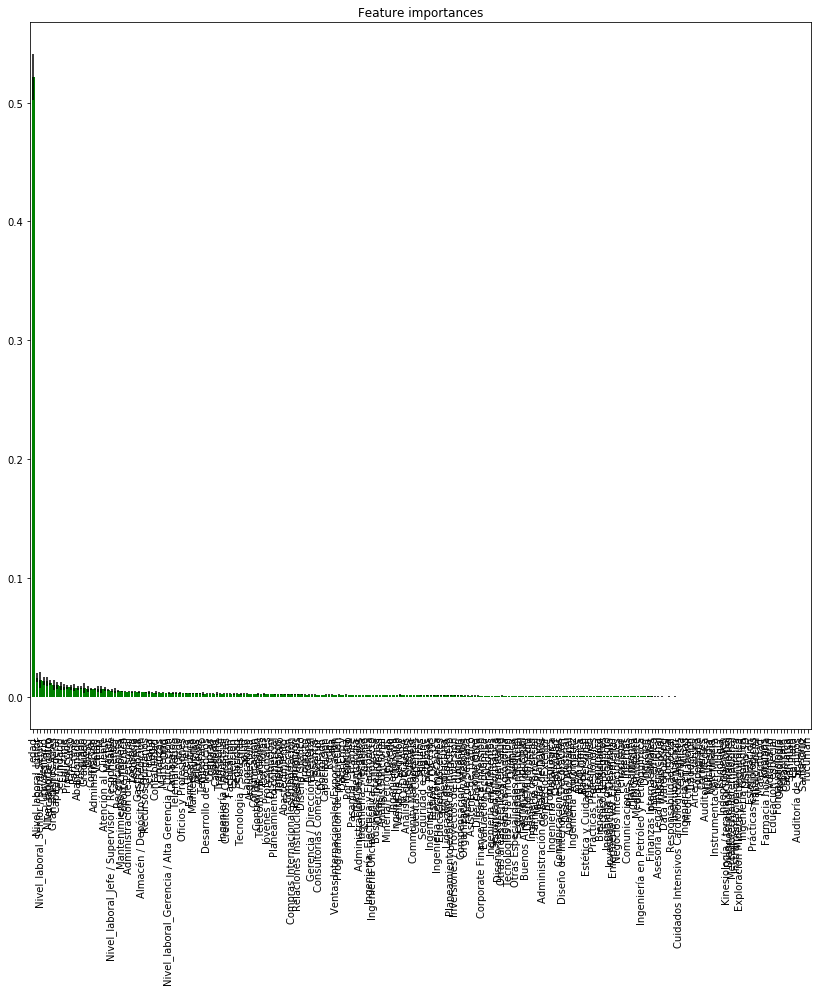

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
columnas = trainingSet_samples.columns.drop("sepostulo")
x_train, x_test, y_train, y_test = train_test_split(trainingSet_samples[columnas],trainingSet_samples['sepostulo']
                                                    , test_size=0.3, random_state=42)

clf = RandomForestClassifier()      
clf = clf.fit(x_train,y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Me quedo con los 131 mas importantes

In [11]:
#Recupero indices de los features "mas importantes"
columnas_lista = columnas.tolist()
columnas_importantes = []
for f in range(131):
    columnas_importantes.append(columnas_lista[f])

Feature ranking:
1. feature 0 (0.541179)
2. feature 43 (0.014732)
3. feature 55 (0.014551)
4. feature 40 (0.014474)
5. feature 38 (0.014001)
6. feature 71 (0.013699)
7. feature 39 (0.012676)
8. feature 9 (0.011138)
9. feature 27 (0.011020)
10. feature 13 (0.010526)
11. feature 67 (0.010434)
12. feature 12 (0.010099)
13. feature 10 (0.009874)
14. feature 15 (0.009683)
15. feature 20 (0.009463)
16. feature 11 (0.009054)
17. feature 28 (0.008905)
18. feature 8 (0.008880)
19. feature 46 (0.008211)
20. feature 37 (0.008117)
21. feature 123 (0.007946)
22. feature 1 (0.007923)
23. feature 45 (0.007680)
24. feature 83 (0.007532)
25. feature 7 (0.007511)
26. feature 2 (0.006909)
27. feature 5 (0.006325)
28. feature 120 (0.006003)
29. feature 68 (0.005830)
30. feature 64 (0.005592)
31. feature 53 (0.005095)
32. feature 119 (0.004843)
33. feature 75 (0.004804)
34. feature 104 (0.004763)
35. feature 92 (0.004645)
36. feature 125 (0.004623)
37. feature 115 (0.004566)
38. feature 87 (0.004494)
39. f

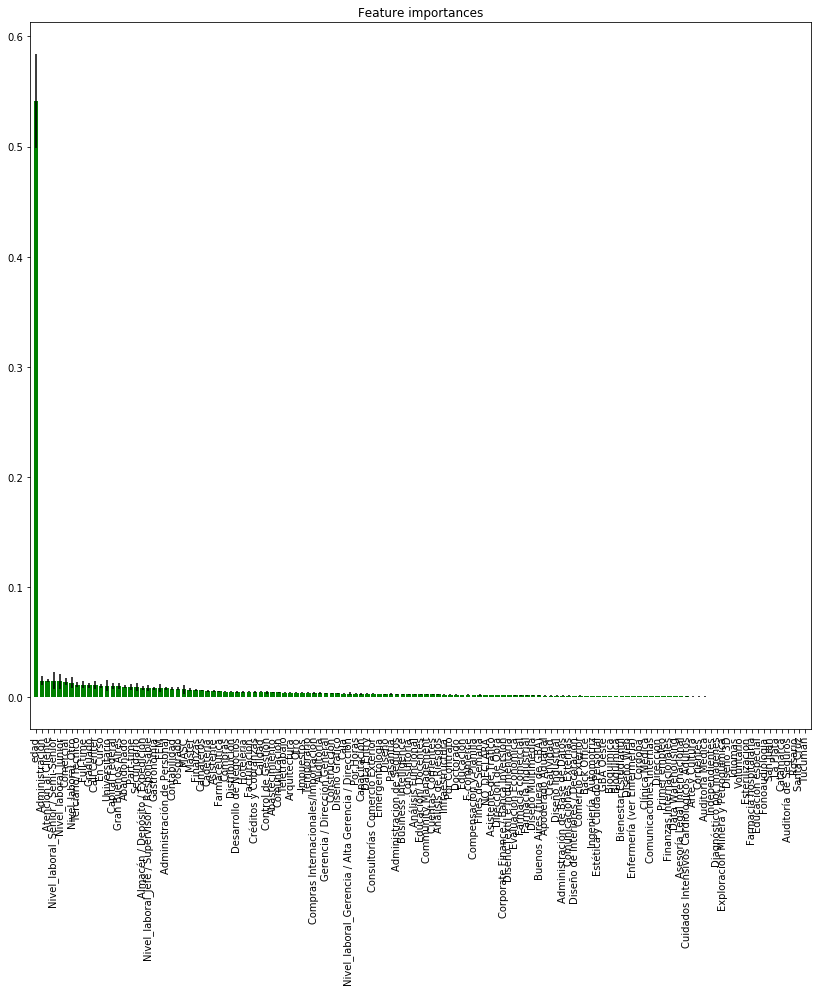

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(trainingSet_samples[columnas_importantes],trainingSet_samples['sepostulo']
                                                    , test_size=0.3, random_state=42)

clf = RandomForestClassifier()      
clf = clf.fit(x_train,y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clr = clf.fit(x_train,y_train)

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = clf.predict(x_test)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_test, y_pred)))

confusion matrix
[[ 27119 139664]
 [ 28618 254599]]
classification report
             precision    recall  f1-score   support

          0       0.49      0.16      0.24    166783
          1       0.65      0.90      0.75    283217

avg / total       0.59      0.63      0.56    450000

-----------------------------------------------------------------------------------------
Accuracy is :
0.62604
Area under the curve : 0.530777


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
columnas = trainingSet_samples.columns.drop("sepostulo")
x_train, x_test, y_train, y_test = train_test_split(trainingSet_samples[columnas],
                                            trainingSet_samples['sepostulo'],test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clr = clf.fit(x_train,y_train)

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = clf.predict(x_test)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_test, y_pred)))

confusion matrix
[[ 41610 125173]
 [ 42145 241072]]
classification report
             precision    recall  f1-score   support

          0       0.50      0.25      0.33    166783
          1       0.66      0.85      0.74    283217

avg / total       0.60      0.63      0.59    450000

-----------------------------------------------------------------------------------------
Accuracy is :
0.6281822222222222
Area under the curve : 0.550339
